In [54]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
energy_efficiency = fetch_ucirepo(id=242)

X = pd.read_csv('x_values.csv')
y = pd.read_csv('y_values.csv')

In [55]:
new_columns = {}
for row in energy_efficiency.variables.itertuples():
    new_columns[getattr(row, 'name')] = getattr(row, 'description')

X = X.rename(columns=new_columns)
y = y.rename(columns=new_columns)
X


,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0,0.98,514.5,294.0,127.686650,7.0,2,0.0,0
1,1,0.98,514.5,294.0,152.183623,7.0,3,0.0,0
2,2,0.98,514.5,294.0,98.742714,7.0,4,0.0,0
3,3,0.98,514.5,294.0,133.230755,7.0,5,0.0,0
4,4,0.90,563.5,318.5,111.216745,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...,...
763,763,0.64,784.0,343.0,187.621212,3.5,5,0.4,5
764,764,0.62,808.5,367.5,206.607482,3.5,2,0.4,5
765,765,0.62,808.5,367.5,207.636220,3.5,3,0.4,5
766,766,0.62,808.5,367.5,247.511452,3.5,4,0.4,5


In [56]:
df = X
df['Heating Load'] = y['Heating Load']
df['Cooling Load'] = y['Cooling Load']

In [57]:
df.head()

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,514.5,294.0,127.686650,7.0,2,0.0,0,13.560191,17.318653
1,1,0.98,514.5,294.0,152.183623,7.0,3,0.0,0,13.560191,17.318653
2,2,0.98,514.5,294.0,98.742714,7.0,4,0.0,0,13.560191,17.318653
3,3,0.98,514.5,294.0,133.230755,7.0,5,0.0,0,13.560191,17.318653
4,4,0.90,563.5,318.5,111.216745,7.0,2,0.0,0,18.850191,24.268653


In [58]:
df.corr()

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Unnamed: 0,1.000000,-6.123101e-02,6.214075e-02,1.182866e-02,0.038111,-5.412663e-02,5.042951e-03,9.528707e-01,4.583453e-01,0.210826,0.150345
Relative Compactness,-0.061231,1.000000e+00,-9.919015e-01,-2.037817e-01,-0.792733,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,0.062141,-9.919015e-01,1.000000e+00,1.955016e-01,0.802821,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,0.011829,-2.037817e-01,1.955016e-01,1.000000e+00,-0.225314,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,0.038111,-7.927328e-01,8.028207e-01,-2.253141e-01,1.000000,-8.699635e-01,2.227711e-03,-1.071817e-02,-9.751049e-04,-0.765823,-0.768810
Overall Height,-0.054127,8.277473e-01,-8.581477e-01,2.809757e-01,-0.869964,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,0.005043,4.678592e-17,-3.459372e-17,-2.429499e-17,0.002228,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,0.952871,-2.960552e-15,3.636925e-15,-8.567455e-17,-0.010718,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,0.458345,-7.107006e-16,2.438409e-15,2.067384e-16,-0.000975,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,0.210826,6.222722e-01,-6.581202e-01,4.556712e-01,-0.765823,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862


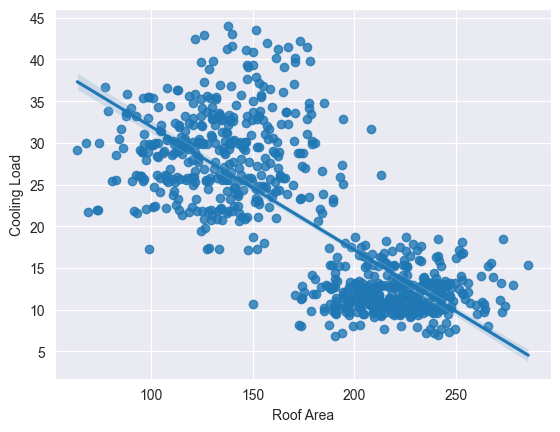

In [59]:
# Let's try and draw a regplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(df, y='Cooling Load', x='Roof Area')
plt.show()

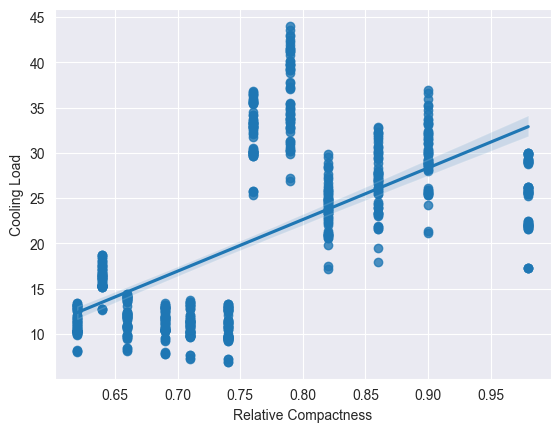

In [60]:
sns.regplot(df, y='Cooling Load', x='Relative Compactness')
plt.show()

## Let's train a stochastic linear regression model.

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df['Roof Area'], df['Cooling Load'], test_size=0.2)

reg_model = Sequential()
reg_model.add(
    Dense(units=1, input_dim=1, activation='linear')
)
reg_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5))
history = reg_model.fit(
    X_train, y_train,  batch_size=10000, epochs=5500)

Epoch 1/5500
1/1 [==============================] - 0s 68ms/step - loss: 52237.1055
Epoch 2/5500
1/1 [==============================] - 0s 2ms/step - loss: 18601.5234
Epoch 3/5500
1/1 [==============================] - 0s 2ms/step - loss: 2421.9858
Epoch 4/5500
1/1 [==============================] - 0s 2ms/step - loss: 1105.1697
Epoch 5/5500
1/1 [==============================] - 0s 1ms/step - loss: 7845.9731
Epoch 6/5500
1/1 [==============================] - 0s 2ms/step - loss: 14112.5605
Epoch 7/5500
1/1 [==============================] - 0s 1ms/step - loss: 15509.5273
Epoch 8/5500
1/1 [==============================] - 0s 1ms/step - loss: 12507.8643
Epoch 9/5500
1/1 [==============================] - 0s 2ms/step - loss: 7542.1387
Epoch 10/5500
1/1 [==============================] - 0s 1ms/step - loss: 3020.2698
Epoch 11/5500
1/1 [==============================] - 0s 1ms/step - loss: 507.4065
Epoch 12/5500
1/1 [==============================] - 0s 2ms/step - loss: 433.0221
Epoch 13/

/Users/rufelleemmanuelpactol/DataspellProjects/EnergyEffeciency/venv/lib/python3.9/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 1ms/step - loss: 188.3701
Epoch 63/5500
1/1 [==============================] - 0s 2ms/step - loss: 207.4131
Epoch 64/5500
1/1 [==============================] - 0s 2ms/step - loss: 218.4312
Epoch 65/5500
1/1 [==============================] - 0s 2ms/step - loss: 214.0409
Epoch 66/5500
1/1 [==============================] - 0s 2ms/step - loss: 198.2854
Epoch 67/5500
1/1 [==============================] - 0s 1ms/step - loss: 182.1144
Epoch 68/5500
1/1 [==============================] - 0s 2ms/step - loss: 175.0226
Epoch 69/5500
1/1 [==============================] - 0s 2ms/step - loss: 178.9655
Epoch 70/5500
1/1 [==============================] - 0s 2ms/step - loss: 188.2692
Epoch 71/5500
1/1 [==============================] - 0s 2ms/step - loss: 194.6940
Epoch 72/5500
1/1 [==============================] - 0s 2ms/step - loss: 193.4419
Epoch 73/5500
1/1 [==============================] - 0s 2ms/step - loss: 185.8629
Epoch 74/5500
1/1 [===========

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 955us/step - loss: 37.1861
Epoch 1837/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1861
Epoch 1838/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1860
Epoch 1839/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1861
Epoch 1840/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1860
Epoch 1841/5500
1/1 [==============================] - 0s 2ms/step - loss: 37.1860
Epoch 1842/5500
1/1 [==============================] - 0s 2ms/step - loss: 37.1860
Epoch 1843/5500
1/1 [==============================] - 0s 2ms/step - loss: 37.1860
Epoch 1844/5500
1/1 [==============================] - 0s 3ms/step - loss: 37.1860
Epoch 1845/5500
1/1 [==============================] - 0s 2ms/step - loss: 37.1860
Epoch 1846/5500
1/1 [==============================] - 0s 3ms/step - loss: 37.1860
Epoch 1847/5500
1/1 [==============================] - 0s 3ms/step - loss: 37.1860
Epoch 1848/5500
1/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3706/5500
1/1 [==============================] - 0s 834us/step - loss: 37.1857
Epoch 3707/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3708/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3709/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3710/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3711/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3712/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3713/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3714/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3715/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3716/5500
1/1 [==============================] - 0s 1ms/step - loss: 37.1857
Epoch 3717/5500
1/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [73]:
reg_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 36.0767


36.07670974731445

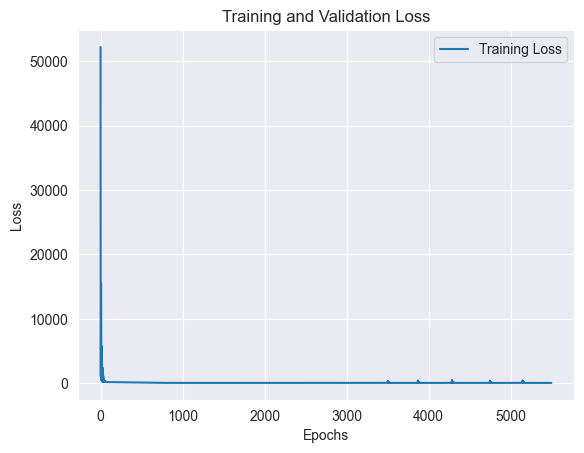

In [74]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 682us/step


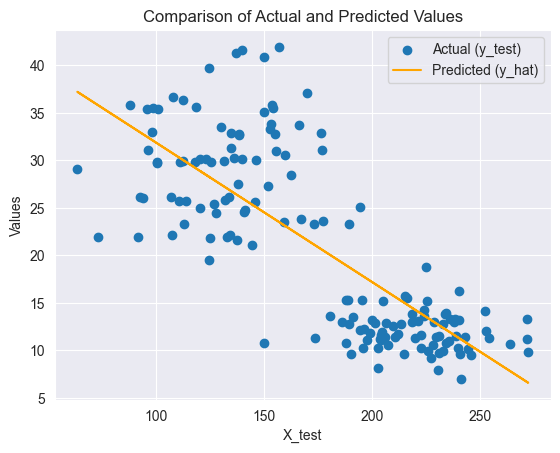

In [75]:
y_hat = reg_model.predict(X_test)
plt.scatter(X_test.squeeze(), y_test, label='Actual (y_test)')
plt.plot(X_test.squeeze(), y_hat, label='Predicted (y_hat)', color='orange')
plt.xlabel('X_test')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [76]:
X_test

118    120.474080
69     146.607292
229    263.839681
21     110.679603
658    218.816778
          ...    
318    229.646530
555    272.110049
105    137.486746
338     92.498265
68     125.485975
Name: Roof Area, Length: 154, dtype: float64